In [19]:
import pandas as pd
import scipy
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


1. Обрати реальні дані з kaggle або сгенерувати випадкові дані, що містять розподіл деякої ознаки в двох групах.

In [56]:
dnn = pd.DataFrame({'pointer' : [11,22,22,11,11,11,11,22,11,22,11,22,22,22,11,22,11,11,22,22],
    'value' : [1,1,2,1,1,1,2,2,2,2,1,2,1,1,2,1,1,2,2,1]})
dnn

,pointer,value
0,11,1
1,22,1
2,22,2
3,11,1
4,11,1
5,11,1
6,11,2
7,22,2
8,11,2
9,22,2


In [57]:
k = pd.crosstab(dnn['pointer'], dnn['value'])
k

value,1,2
pointer,,
11,6,4
22,5,5


2. Побудувати графік, що відображає розподіл ознак в групах.

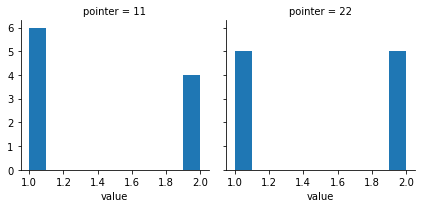

In [63]:
fig = sns.FacetGrid(dnn, col="pointer")
fig = fig.map(plt.hist, "value");

In [89]:
def pirson(data, significant_level):
    
    t1 = []
    for i in data.iloc[:,0]: 
        b1 = True
        for j in t1:
            if(i == j):
                b1 = False
        if(b1):
            t1.append(i)
            
    t2 = []
    for i in data.iloc[:,1]:
        b1 = True
        for j in t2:
            if(i == j):
                b1 = False
        if(b1):
            t2.append(i)
            
    t1 = np.sort(t1)
    t2 = np.sort(t2)
    
    pirson = pd.DataFrame({
        (t2[0]):(0 for i in range(len(t1))),
        (t2[1]):(0 for i in range(len(t1))),
    }, index = t1)
    for i in range(len(data)):
        pirson[data.iloc[i,1]][data.iloc[i,0]] += 1
        
    print(pirson)
    if (sum(pirson.iloc[:,0]) != sum(pirson.iloc[:,1])):
        pirson[pirson.columns[1]] = [x/sum(pirson.iloc[:,1])*sum(pirson.iloc[:,0]) for x in pirson.iloc[:,1]]
    pirson["ni - ni'"] = [(pirson.iloc[i,0] - pirson.iloc[i,1]) for i in range(len(pirson))]
    pirson["(ni - ni')^2/(ni')"] = [pirson.iloc[i,2]**2/pirson.iloc[i,1] for i in range(len(pirson))]
    
    print()
    print("Таблиця спряженості")
    print(pirson)
    
    ksi = sum(pirson.iloc[:,3])
    print()
    print("X^2: " + str(ksi))
    print("Ступені свободи: " + str(len(pirson)-1))
    
    crit = pd.read_excel("Таблиця критичних значень для критерію Пірсона.xlsx").iloc[len(pirson)-1, 1 if(significant_level == 0.01) else 2]
    print("X^2 критичне: " + str(crit))
    return "Розбіжність відсутня: %.2f "%ksi+"< %.1f "%crit if (ksi < crit) else "Розбіжність присутня: %.2f"%ksi+"> %.1f "%crit

In [90]:
pirson(dnn, 0.01)

    1  2
11  6  4
22  5  5

Таблиця спряженості
    1         2  ni - ni'  (ni - ni')^2/(ni')
11  6  4.888889  1.111111            0.252525
22  5  6.111111 -1.111111            0.202020

X^2: 0.4545454545454549
Ступені свободи: 1
X^2 критичне: 6.6


'Розбіжність відсутня: 0.45 < 6.6 '

In [85]:
pirson(dnn, 0.05)

Таблиця спряженості
    1  2
11  6  4
22  5  5

Таблиця спряженості
    1         2  ni - ni'  (ni - ni')^2/(ni')
11  6  4.888889  1.111111            0.252525
22  5  6.111111 -1.111111            0.202020

X^2: 0.4545454545454549
Ступені свободи: 1
X^2 критичне: 3.8


'Розбіжність відсутня: 0.455 (дані)< 3.8 (критичне)'

3. Додати до таблиці стовбчики з відсотовим розподілом по градаціям всередині груп. Окремо вивести результати роботи критерію (чи є статистична розбіжність між групами).

In [79]:
val11_1 = str((6/11))
print(val11_1)
val11_2 = str((4/9))
print(val11_2)
val22_1 = str((5/11))
print(val22_1)
val22_2 = str((5/9))
print(val22_2)

0.5454545454545454
0.4444444444444444
0.45454545454545453
0.5555555555555556


In [80]:
d = {'pointer 11': [6,5], 'pointer 22': [4,5], 'value 1': [0.5454545454545454,0.4444444444444444], 
     'value 2': [0.45454545454545453,0.5555555555555556]}
new_df = pd.DataFrame(data=d,index = ["pointer11","pointer22"])
new_df

,pointer 11,pointer 22,value 1,value 2
pointer11,6,4,0.545455,0.454545
pointer22,5,5,0.444444,0.555556
